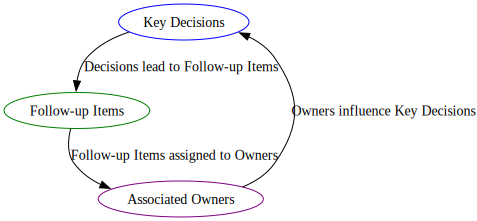

In [3]:
from pydantic import BaseModel, Field
from typing import List
from openai import OpenAI
import instructor
from graphviz import Digraph
import argparse

class Node(BaseModel):
    id: int
    label: str
    color: str

class Edge(BaseModel):
    source: int
    target: int
    label: str
    color: str = "black"

class KnowledgeGraph(BaseModel):
    nodes: List[Node] = Field(..., default_factory=list)
    edges: List[Edge] = Field(..., default_factory=list)

# Adds response_model to ChatCompletion
# Allows the return of Pydantic model rather than raw JSON
client = instructor.patch(OpenAI())

def generate_graph(input) -> KnowledgeGraph:
    return client.chat.completions.create(
        model="gpt-3.5-turbo",
        messages=[
            {
                "role": "user",
                "content": f"Help me understand the following by describing it as a detailed knowledge graph: {input}",
            }
        ],
        response_model=KnowledgeGraph,
    )  # type: ignore

def visualize_knowledge_graph(kg: KnowledgeGraph):
    dot = Digraph(comment="Knowledge Graph")

    # Add nodes
    for node in kg.nodes:
        dot.node(str(node.id), node.label, color=node.color)

    # Add edges
    for edge in kg.edges:
        dot.edge(str(edge.source), str(edge.target), label=edge.label, color=edge.color)

    # Render the graph
    # dot.render("knowledge_graph.gv", view=True)
    display(dot)
    
    

graph: KnowledgeGraph = generate_graph("""
First, list the key decisions, follow-up items, and associated owners in a sketchpad.
Then, check that the details in the sketchpad are factually consistent with the transcript.
Finally, synthesize the key points into a concise summary.""")
visualize_knowledge_graph(graph)